In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Heart Disease Dataset.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Get Object Columns
object_columns = df.select_dtypes(include="object")

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
be = BinaryEncoder(object_columns)
df = be.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


In [ ]:
df.isnull().sum()

,0
Age,0
Sex_0,0
Sex_1,0
ChestPainType_0,0
ChestPainType_1,0
ChestPainType_2,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG_0,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
x = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [ ]:
# Apply KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)
# 100 ==> 60 ==> 1, 40 ==> 0 ==> Train = 80 ==> 48 class 1 32 class 0

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9) # metric = "minkowski", p=2
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69        82
           1       0.75      0.75      0.75       102

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[56, 26],
       [25, 77]])

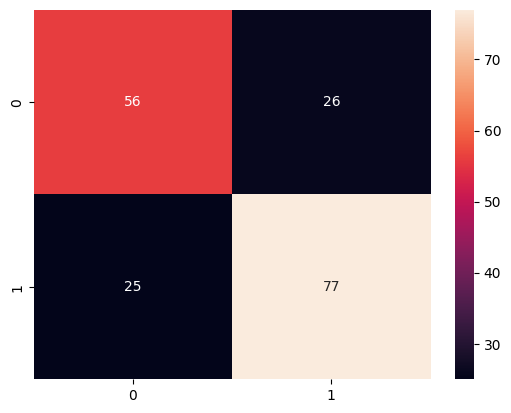

In [ ]:
# Display Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()

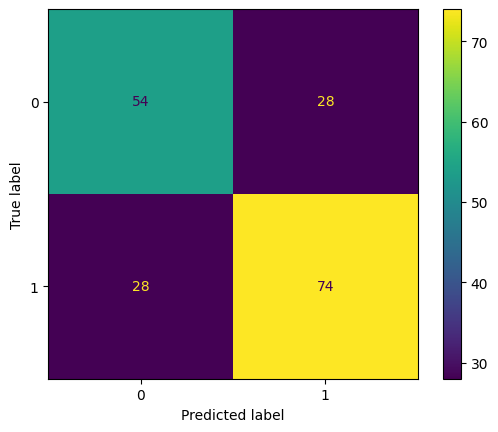

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Apply Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_predict = gnb.predict(x_test)

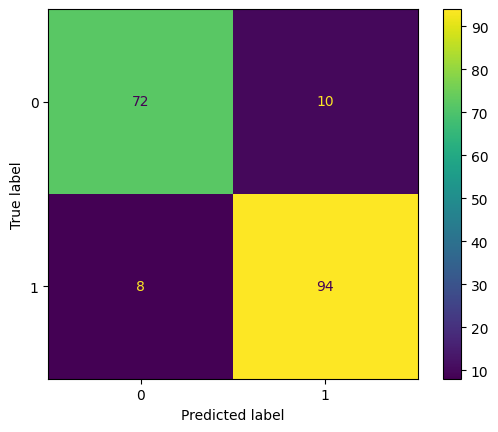

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Accuraccy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9021739130434783

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.9215686274509803

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_predict)

0.9038461538461539

- If we have 300000 ==> 1000 of them are fraud ==> Class 1 and the rest 290000 are not fraud.

- Predictions: 300000 ==> Not fraud. ==> Accuracy = 96.7

- Recall: 0/1000 = 0